# Happy countries

Have you ever wondered why some countries are happier than others? This can be a tricky question to answer as it is difficult to precisely describe what happiness is. There can be many ways to measure happiness, one of which is the life ladder from the World Happiness Report. 

The old adage "money can't buy happiness" tells us that money does not lead to happiness. Is this really true? Are richer countries more happy? This could be a difficult question to answer definitely, but I will take a closer look at the data and see if I can discover a nuanced answer to this question. 

There are of course many more questions one can ask about happiness. I'll first start by asking a few of them.

## Questions

* What measures correlate with the happiness of a country?
* Do happy countries stay happy?
* Does the average happiness change over time?

## Importing the data

The data I will be using comes from the [World Happiness Report](https://worldhappiness.report/ed/2023/#appendices-and-data). The source has a more in-depth explanation of the data, but I will summarize the explanation of each variable here. 

* Year - A year between 2005 and 2022, inclusive. <br><br>

* Life ladder - A happiness score from 0 to 10. The top of the ladder, at 10, represents the best possible life, and the bottom of the ladder, at 0, represents the worst possible life. <br><br>

* Log GDP per capita - GDP is measured in purchasing power parity (PPP) at 2017 international dollar prices. The natural logarithm is taken to fit all the values in a small range.<br><br>

* Social support - Proportion of people who feel that they have relatives or friends who can help them in times of trouble.<br><br>

* Health life expectancy at birth - Expected years of life in good health, interpolated and extrapolated from data from the years 2000, 2010, 2015, 2019.<br><br>

* Freedom to make life choices - Proportion of people who feel that they have freedom to choose what to do with their lives. <br><br>

* Generosity - Proportion of people who have donated money to charity recently above or below the expected proportion based on GDP per capita.<br><br>

* Perceptions of corruption - Average of the proportion of people who believe government corruption is widespread and those who believe business corruption is widespread. <br><br>

* Positive affect - Measure of laughter, enjoyment, and doing interesting things, on a scale from 0 to 1. <br><br>

* Negative affect - Measure of worry, sadness, and anger, on a scale from 0 to 1.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")


from collections import Counter

In [2]:
# read the Excel file from the World Happiness Report
df = pd.read_excel('WHR2023.xls')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


## Cleaning the data

Now I want to prepare the data for analysis. I will look for missing values and formatting inconsistencies. Then, I want to organize the data in a way so that it can be easily analyzed. 

I first name the columns so that each variable can be referenced later in the code. 

In [3]:
# name the columns
df.columns = ['country', 'year', 'ladder', 'gdp', 'support', 'hale', 'choice', 'generosity', 'corruption', 'positive', 'negative']

Next, I make sure that each of the columns has the appropriate data type. 

In [4]:
df.dtypes

country        object
year            int64
ladder        float64
gdp           float64
support       float64
hale          float64
choice        float64
generosity    float64
corruption    float64
positive      float64
negative      float64
dtype: object

It looks like each column has the correct data type. Let's see if the entries look reasonable. I will start by checking if each row corresponds to a unique country-year pair.

In [5]:
# delete duplicate country-year pairs
df.drop_duplicates(subset=['country','year'], inplace = True)
df

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


There are still the same number of rows, so I have confirmed that each row corresponds to a unique country-year pair. Next, I record how many years of data each country has. Then I look at the countries with a low number of entries to check for potential errors. 

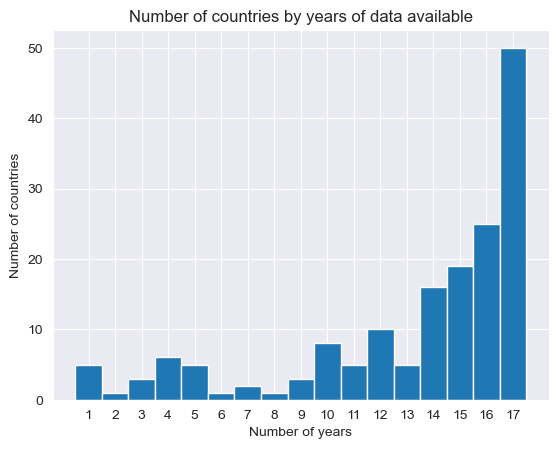

In [6]:
# create a list of number of entries
country_counter = Counter(df['country'])
country_number_of_years = list(country_counter.values())

# plot number of entries vs. number of countries with that number of entries
binwidth = 1
bin_parameters1 = np.arange(min(country_number_of_years), max(country_number_of_years) + 2*binwidth , binwidth)
bin_parameters2 = np.arange(min(country_number_of_years), max(country_number_of_years) + binwidth , binwidth)
plt.hist(country_number_of_years, bins=bin_parameters1)
plt.xticks(bin_parameters2+.5, bin_parameters2)
plt.xlabel('Number of years')
plt.ylabel('Number of countries')
plt.title('Number of countries by years of data available')
plt.show()

In [7]:
# pick out the countries with only a few entries
countries_with_few_entries = []
threshold = 3
for country in country_counter:
    if country_counter[country] <= threshold:
        countries_with_few_entries.append(country)
print('The countries with 3 or fewer data points are :', ', '.join(countries_with_few_entries))

The countries with 3 or fewer data points are : Belize, Bhutan, Cuba, Eswatini, Guyana, Maldives, Oman, Somalia, Suriname


It seems like there are no problems with the country names. These are just countries with a low number of entries, not misspelled country names. 

I also want to check if the other variables have reasonable entries. I plot the distributions of each variable to spot potential outliers. I plot the variables that are not on a scale from 0 to 1 separately from those that are on a scale from 0 to 1. 

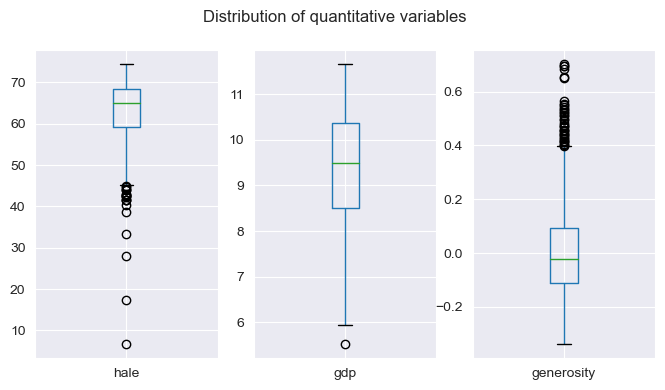

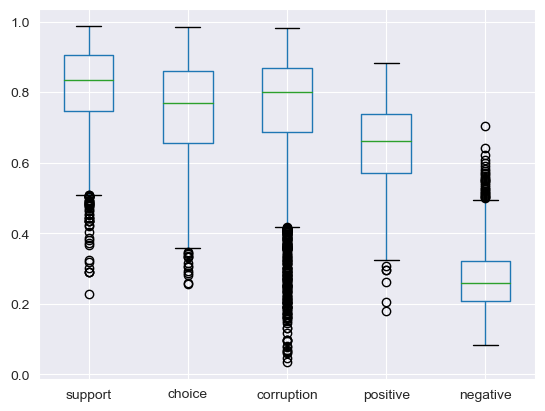

In [8]:
# plot the box plots of variables that are not on a scale from 0 to 1
fig, axes = plt.subplots(1,3,figsize = (8,4))

df.boxplot(column='hale', ax = axes[0])
df.boxplot(column='gdp', ax = axes[1])
df.boxplot(column='generosity', ax = axes[2])

fig.suptitle('Distribution of quantitative variables')
plt.show()


# plot the box plots of variables that are a scale from 0 to 1

df.boxplot(column = ['support', 'choice', 'corruption', 'positive', 'negative'])
plt.show()

Out of all of the variables plotted, it seems like the following variables have some potential outliers.
- Health life expectancy at birth
- Log GDP per capita
- Generosity
- Social support
- Positive affect
- Negative affect

I will take a look at each variable.

### Health life expectancy at birth
Based on the box plot, the values of health life expectancy at birth below 40 look to be incorrect. Let's take a closer look at these entries. 

In [9]:
# consider all rows where the health life expectancy at birth value is less than 40
df[df['hale'] < 40]

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
766,Haiti,2006,3.754156,7.972617,0.693801,6.720000,0.449475,0.358533,0.853506,0.583196,0.332141
767,Haiti,2008,3.846329,8.012043,0.679098,17.360001,0.464971,0.216526,0.811659,0.572523,0.255774
768,Haiti,2010,3.765999,7.983535,0.554031,28.000000,0.372941,0.170872,0.848007,0.495069,0.292557
769,Haiti,2011,4.844574,8.022003,0.567039,33.320000,0.412588,0.197880,0.681960,0.550258,0.244856
770,Haiti,2012,4.413475,8.011640,0.748663,38.639999,0.482486,0.246083,0.717166,0.556583,0.283806


Since all of these entries correspond to Haiti and the values of health life expectancy at birth were interpolated and extrapolated, I suspect that this interpolation and extrapolation created some unrealistic values. Let's look at all of the entries for Haiti.

In [10]:
# consider all the rows for Haiti
haiti_data = df[df['country'] == 'Haiti']
haiti_data.head(n=17)

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
766,Haiti,2006,3.754156,7.972617,0.693801,6.720000,0.449475,0.358533,0.853506,0.583196,0.332141
767,Haiti,2008,3.846329,8.012043,0.679098,17.360001,0.464971,0.216526,0.811659,0.572523,0.255774
768,Haiti,2010,3.765999,7.983535,0.554031,28.000000,0.372941,0.170872,0.848007,0.495069,0.292557
769,Haiti,2011,4.844574,8.022003,0.567039,33.320000,0.412588,0.197880,0.681960,0.550258,0.244856
770,Haiti,2012,4.413475,8.011640,0.748663,38.639999,0.482486,0.246083,0.717166,0.556583,0.283806
771,Haiti,2013,4.621962,8.038989,0.648351,43.959999,0.610410,0.246384,0.668976,0.528251,0.326656
772,Haiti,2014,3.888778,8.041408,0.554149,49.279999,0.508805,0.242564,0.707521,0.573324,0.327208
773,Haiti,2015,3.569762,8.052312,0.564320,54.599998,0.398295,0.262779,0.777404,0.597597,0.332540
774,Haiti,2016,3.352300,8.056166,0.583742,54.900002,0.303540,0.247953,0.838523,0.532205,0.367341
775,Haiti,2017,3.823866,8.067083,0.646985,55.200001,0.484429,0.336749,0.647192,0.570107,0.321693


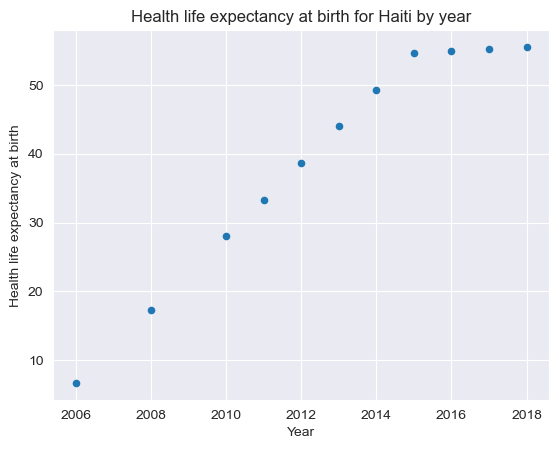

In [11]:
# plot the health life expectancy data for Haiti for each year
ax = haiti_data.plot.scatter('year', 'hale')
ax.set_title('Health life expectancy at birth for Haiti by year')
ax.set_xlabel('Year')
ax.set_ylabel('Health life expectancy at birth')
plt.show()

The scatterplot confirms our suspicions that the health life expectancy data for Haiti has unrealistic values due to extrapolation. For now, I clear the values less than 50.

In [12]:
# set the cells for Haiti and health life expectancy of less than 50 to be empty
for n in range(766, 773):
    df.at[n, 'hale'] = np.nan

df[df['country'] == 'Haiti']

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
766,Haiti,2006,3.754156,7.972617,0.693801,NaN,0.449475,0.358533,0.853506,0.583196,0.332141
767,Haiti,2008,3.846329,8.012043,0.679098,NaN,0.464971,0.216526,0.811659,0.572523,0.255774
768,Haiti,2010,3.765999,7.983535,0.554031,NaN,0.372941,0.170872,0.848007,0.495069,0.292557
769,Haiti,2011,4.844574,8.022003,0.567039,NaN,0.412588,0.197880,0.681960,0.550258,0.244856
770,Haiti,2012,4.413475,8.011640,0.748663,NaN,0.482486,0.246083,0.717166,0.556583,0.283806
771,Haiti,2013,4.621962,8.038989,0.648351,NaN,0.610410,0.246384,0.668976,0.528251,0.326656
772,Haiti,2014,3.888778,8.041408,0.554149,NaN,0.508805,0.242564,0.707521,0.573324,0.327208
773,Haiti,2015,3.569762,8.052312,0.564320,54.599998,0.398295,0.262779,0.777404,0.597597,0.332540
774,Haiti,2016,3.352300,8.056166,0.583742,54.900002,0.303540,0.247953,0.838523,0.532205,0.367341
775,Haiti,2017,3.823866,8.067083,0.646985,55.200001,0.484429,0.336749,0.647192,0.570107,0.321693


After dropping these values, I check the box plot again to see if the distribution has any questionable values. 

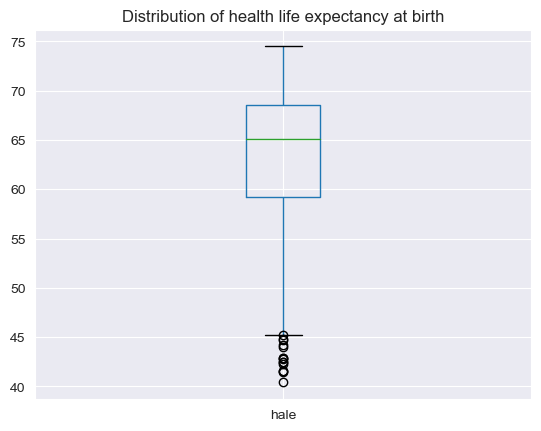

In [13]:
# plot a box plot for health life expectancy at birth
df.boxplot(column = ['hale'])
plt.title('Distribution of health life expectancy at birth')
plt.show()

It looks like that the distribution for health life expectancy at birth has reasonable values now. 

### Log GDP per capita
From the box plot for log GDP per capita, there is one outlier. Let's find the corresponding entry.

In [14]:
# find the row with the lowest log GDP per capita
df.nsmallest(1, 'gdp')

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
2134,Venezuela,2019,5.080803,5.526723,0.887672,64.400002,0.625526,0.128371,0.83934,0.729553,0.35095


I determine that this is not an unrealistic value due to the economic crisis in Venezuela. 

### Generosity
Looking at the box plot for generosity, I want to analyze the values of generosity that is greater than 0.6.

In [15]:
# list entries where generosity is greater than 0.6.
df[df['generosity'] > .6]

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
1345,Myanmar,2012,4.438940,8.066872,0.612250,58.160000,0.691094,0.649480,0.694739,0.573841,0.205414
1346,Myanmar,2013,4.175671,8.134365,0.756725,58.639999,0.775448,0.694116,0.637766,0.675413,0.217311
1347,Myanmar,2014,4.786247,8.204834,0.774267,59.119999,0.870297,0.702708,0.591633,0.713258,0.111979
1348,Myanmar,2015,4.223846,8.229056,0.752064,59.599998,0.807971,0.694700,0.633305,0.729089,0.271751
1349,Myanmar,2016,4.623120,8.321071,0.793462,59.924999,0.877491,0.683419,0.607287,0.671309,0.301501
1350,Myanmar,2017,4.154342,8.369377,0.795184,60.250000,0.886012,0.654492,0.618822,0.616757,0.282286


I determine that these are not unrealistic values due to [Myanmar's reputation for generosity](https://www.cnn.com/2016/10/26/world/world-generosity-index-caf-2016/index.html).

### Social support
As for social support, looking at the box plot, I see that there is a cluster of values below 0.35 that needs analyzing.

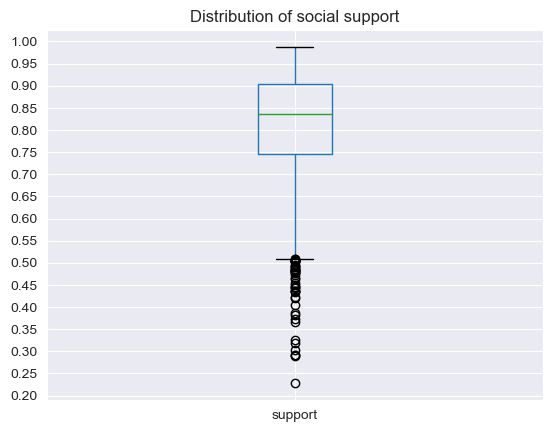

In [16]:
# replot the box plot for social support with more ticks on the y-axis.
df.boxplot(column='support')
plt.yticks(np.arange(0.2,1.05,.05))
plt.title('Distribution of social support')
plt.show()

In [17]:
# list entries with a social support value of less than 0.35.
df[df['support'] < .35]

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
288,Burundi,2008,3.563228,6.700229,0.290934,49.660000,0.260069,-0.018414,0.859814,0.415190,0.252771
289,Burundi,2009,3.791681,6.686863,0.325693,50.279999,0.427356,-0.017508,0.718203,0.606856,0.163643
347,Central African Republic,2016,2.693061,6.707346,0.290184,44.750000,0.624057,0.037318,0.859073,0.550785,0.494268
348,Central African Republic,2017,3.475862,6.732925,0.319589,45.299999,0.645252,0.077883,0.889566,0.602205,0.599335
1951,Togo,2008,2.807855,7.312004,0.291334,51.119999,0.286814,-0.074570,0.931986,0.397701,0.378715
1952,Togo,2011,2.936221,7.405950,0.302955,52.439999,0.584088,-0.089822,0.832004,0.478782,0.395363


For each of these countries, I plot its social support values over time to check the validity of the social support values. 

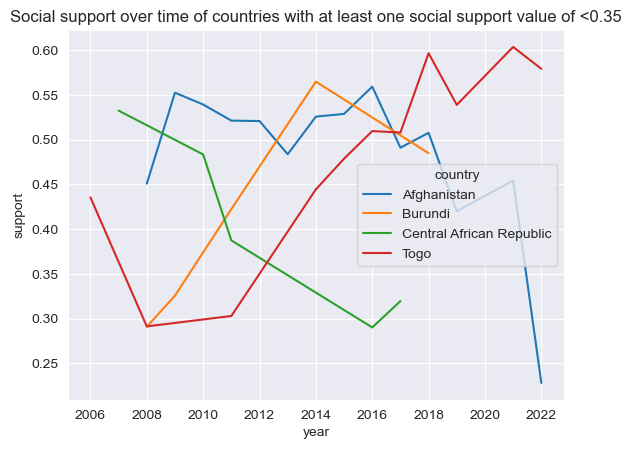

In [18]:
# plot the social support values over time of countries with at least one year of social support value of less than 0.35
countries_low_support = ['Afghanistan', 'Burundi', 'Central African Republic', 'Togo']
countries_low_support_data = df[df['country'].isin(countries_low_support)]
sns.lineplot(data=countries_low_support_data, x='year', y='support', hue='country')
plt.title('Social support over time of countries with at least one social support value of <0.35')
plt.show()

The social support values do not look to be unrealistic, so we leave these values alone. 

### Positive affect
Now, let's focus on the positive affect. The two smallest values for positive affect are potentially incorrect values. Let's pick them out.

In [19]:
# pick out entries with the two smallest values for positive affect
df.nsmallest(2, 'positive')

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
12,Afghanistan,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512


I keep these values the same since they reflect the political situation in Afghanistan.

### Negative affect
I consider the entry with the highest value for negative affect since the box plot indicates that this is potentially an incorrect value. 

In [20]:
df.nlargest(1, 'negative')

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
1882,Syria,2012,3.164491,8.577606,0.588395,61.580002,0.466771,0.312485,0.672964,0.451005,0.70459


This value will also be kept since it is likely the result of the Syrian civil war. 

## Missing data

Now the missing entries require some treatment. I'll try to learn more about where the missing data is in order to determine how to handle the missing entries. 

In [21]:
# calculate percentage of rows with at least one missing value
num_of_entries = len(df)
print('{}% of the rows have at least one missing value.'.format((num_of_entries-len(df.dropna()))/num_of_entries*100))

11.277853569804456% of the rows have at least one missing value.


Removing all of these entries would remove too large of a portion of the dataset. To figure out how to handle the missing values, I look at the distribution of these missing values throughout the dataset.

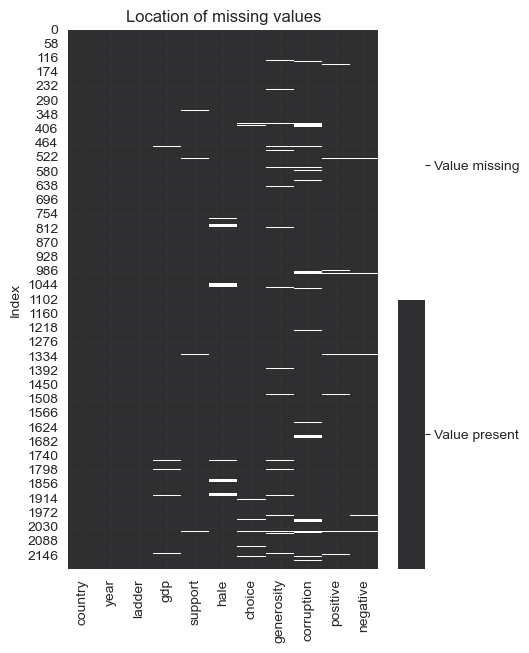

In [22]:
# show the location of the missing values in the dataset

from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(5,7))

cdict = ((0.0, 0.0, 0.0, 0.8), (1.0, 1.0, 1.0, 1.0))
black_white = LinearSegmentedColormap.from_list('', cdict, 2)

ax = sns.heatmap(df.isnull(), cmap=black_white)
ax.set_ylabel('Index')
cb = ax.collections[0].colorbar
cb.set_ticks([0.25, 0.75])
cb.set_ticklabels(['Value present', 'Value missing'])
ax.set_title('Location of missing values')

plt.show()

I notice that there are sizable vertical white chunks. Since the data is grouped by country, this could indicate that for some countries, a certain variable is completely missing values. If this is the case, then removing all rows with any missing values will remove all the data for those countries. Therefore, I check if this is the case. I want to see if there are other countries where there exists a variable such that its value is missing for all of the entries of that country.

In [23]:
# pick out countries with a variable with no data
countries = list(set(df['country']))
missing_data_countries = []
for country in countries:
    country_data = df[df['country'] == country]
    years_of_data = len(country_data)
    
    # count number of missing value per variable for a particular country
    country_data_null_counts = country_data.isnull().sum()
    
    for var_count in country_data_null_counts:
        if years_of_data == var_count:
            missing_data_countries.append(country)
            break

print('The countries with a variable without any data are:', end = ' ')
print(*missing_data_countries, sep =', ', end = '.')

The countries with a variable without any data are: Cuba, Hong Kong S.A.R. of China, Oman, China, Maldives, South Sudan, Somaliland region, Kosovo, Turkmenistan.

Since there are several countries that have missing data for at least one variable, I decide to not simply remove all the rows with any missing data. If most of the rows with missing data just has one value missing, then I can use a linear regression to fill in the missing values. For this reason, I check how many missing values we have for each row. 

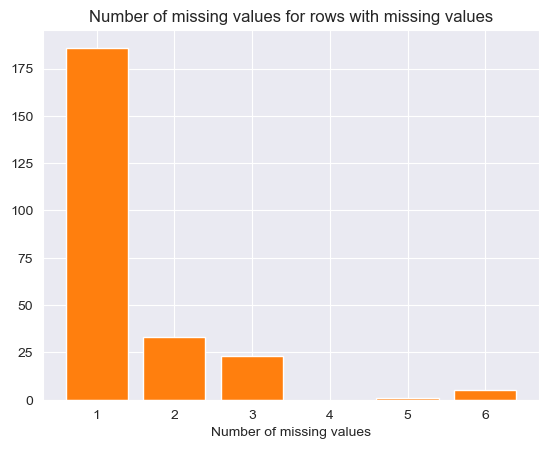

In [24]:
# calculate distribution of how many missing values there are for each row

# add up number of missing values for each row
num_miss_vals = df.isnull().sum(axis=1)

# plot histogram for rows with at least one missing value
labels, counts = np.unique(num_miss_vals[lambda n : n > 0], return_counts=True)
plt.bar(labels, counts, color = 'tab:orange', align = 'center')
plt.title('Number of missing values for rows with missing values')
plt.xlabel('Number of missing values')
plt.show()

Most of these entries have only one missing value, so I decide to remove rows with at least two missing values. This does potentially eliminate all of the entries from some countries, but I am willing to accept this as there would be insufficient data. After removing the rows with at least two missing values, I will use linear regressions to fill in the remaining missing values. 

In [25]:
# remove rows with at least two missing values
df.dropna(thresh=len(df.columns)-1, inplace = True)

df

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [26]:
# fill in missing values using linear regression

from sklearn.linear_model import LinearRegression

df_filled = df.copy()

# get a count of the number of missing values per variable, sorted in ascending order
num_of_missing_val = df.isnull().sum()
num_of_missing_val = num_of_missing_val[num_of_missing_val > 0]
num_of_missing_val.sort_values(inplace = True)

# get variables with missing values to be replaced
variables = num_of_missing_val.index

for var in variables:
    # keep rows with no missing values
    df_filled_no_missing = df_filled.dropna()
    
    # numerical variables that are not the current variable with missing values to be replaced
    other_vars = [v for v in df.columns[1:] if v != var]
    
    x = df_filled_no_missing[other_vars]
    y = df_filled_no_missing[var]
    
    # create 
    model = LinearRegression().fit(x, y)
    
    # predict variable with missing value
    missing_vals = list(model.predict(df_filled[other_vars][df_filled[var].isnull()]))
    
    # fill in the missing values
    leng = len(df_filled)
    missing_row = df_filled[var].isnull()
    col = list(df_filled.columns).index(var)
    for n in range(leng):
        if missing_row.iat[n]:
            df_filled.iat[n, col] = missing_vals.pop(0)

Now I verify that there are no more missing values.

In [27]:
print('There are {} missing values in the df_filled dataframe.'.format(df_filled.isnull().sum().sum()))

There are 0 missing values in the df_filled dataframe.


I now compare the univariate distributions of each feature. I look at the distribution of each feature before and after the missing values were filled. 

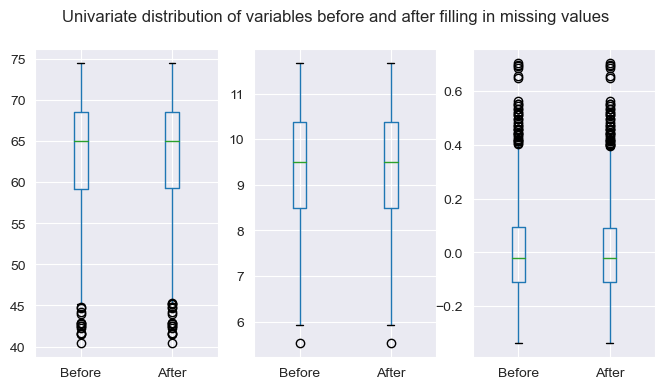

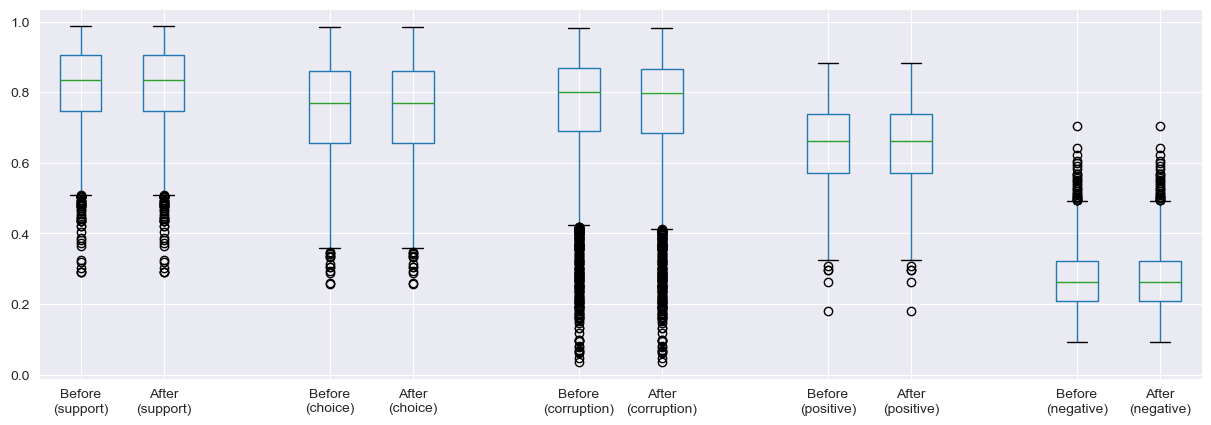

In [28]:
# plot the box plots of variables that are not on a scale from 0 to 1

plt.figure(figsize=(8,4))

plt.subplot(1, 3, 1)
data = pd.DataFrame({"Before": df['hale'], "After": df_filled['hale']})
data.boxplot()

plt.subplot(1, 3, 2)
data = pd.DataFrame({"Before": df['gdp'], "After": df_filled['gdp']})
data.boxplot()

plt.subplot(1, 3, 3)
data = pd.DataFrame({"Before": df['generosity'], "After": df_filled['generosity']})
data.boxplot()

plt.suptitle('Univariate distribution of variables before and after filling in missing values')
plt.show()

# plot the box plots of variables that are a scale from 0 to 1
data = pd.DataFrame({"Before\n(support)": df['support'], "After\n(support)": df_filled['support'],
                     "Before\n(choice)": df['choice'], "After\n(choice)": df_filled['choice'],
                     "Before\n(corruption)": df['corruption'], "After\n(corruption)": df_filled['corruption'],
                     "Before\n(positive)": df['positive'], "After\n(positive)": df_filled['positive'],
                     "Before\n(negative)": df['negative'], "After\n(negative)": df_filled['negative']
                    })
plt.figure().set_figwidth(15)
data.boxplot(positions=[1,2,4,5,7,8,10,11,13,14])
plt.show()

The box plots show me that the univariate distributions were not disturbed very much as a result of filling in the missing values. 

Lastly, since I removed some of the health life expectancy at birth data for Haiti and then filled in those missing values, I want to verify the replaced values are reasonable. 

In [29]:
# show rows corresponding to Haiti
df_filled[df_filled['country'] == 'Haiti']

,country,year,ladder,gdp,support,hale,choice,generosity,corruption,positive,negative
766,Haiti,2006,3.754156,7.972617,0.693801,55.295679,0.449475,0.358533,0.853506,0.583196,0.332141
767,Haiti,2008,3.846329,8.012043,0.679098,55.083417,0.464971,0.216526,0.811659,0.572523,0.255774
768,Haiti,2010,3.765999,7.983535,0.554031,55.247452,0.372941,0.170872,0.848007,0.495069,0.292557
769,Haiti,2011,4.844574,8.022003,0.567039,56.431827,0.412588,0.197880,0.681960,0.550258,0.244856
770,Haiti,2012,4.413475,8.011640,0.748663,56.723928,0.482486,0.246083,0.717166,0.556583,0.283806
771,Haiti,2013,4.621962,8.038989,0.648351,57.500036,0.610410,0.246384,0.668976,0.528251,0.326656
772,Haiti,2014,3.888778,8.041408,0.554149,56.169466,0.508805,0.242564,0.707521,0.573324,0.327208
773,Haiti,2015,3.569762,8.052312,0.564320,54.599998,0.398295,0.262779,0.777404,0.597597,0.332540
774,Haiti,2016,3.352300,8.056166,0.583742,54.900002,0.303540,0.247953,0.838523,0.532205,0.367341
775,Haiti,2017,3.823866,8.067083,0.646985,55.200001,0.484429,0.336749,0.647192,0.570107,0.321693


The values for health life expectancy at birth for Haiti look to be around those values that were not replaced. 

## Analysis 

Now that the data has reasonable values and is free from missing values, I can start exploring the data. I start with determining which variables are correlated. 

### Correlation analysis

First, I create the correlation matrix for all of the variables. This allows us to see how strongly each pair of variables is correlated. The correlation matrix is also shown as a heatmap with darker colors showing a stronger correlation. This allows us to spot the stronger correlations more easily.

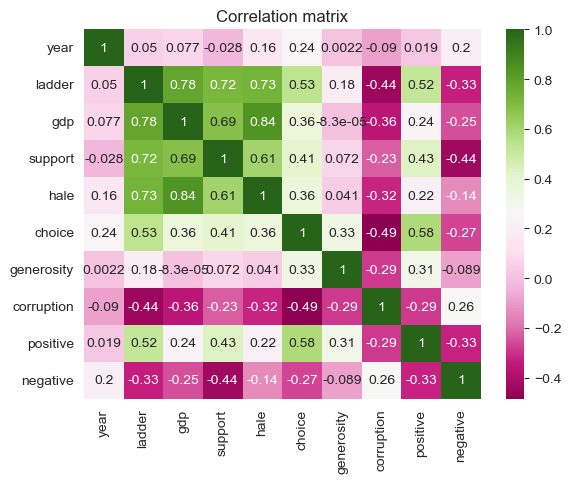

In [30]:
# create correlation matrix of all variables, with a heatmap 

corr_mat = df_filled.corr(numeric_only=True)

sns.heatmap(corr_mat, annot = True, cmap = 'PiYG')
plt.title('Correlation matrix')
plt.show()

The happiness score (life ladder) correlates most strongly with log GDP per capita, social support, and health life expectancy at birth. However, positive affect is arguably another measure of happiness. If I take a look at which features correlate with positive affect the most, then I see that positive affect is actually most strongly correlated with freedom of choice. Additionally, log GDP per capita and positive affect only have a weak correlation. 

I now compare the relationship between life ladder vs. log GDP per capita and positive affect vs. log GDP per capita. 

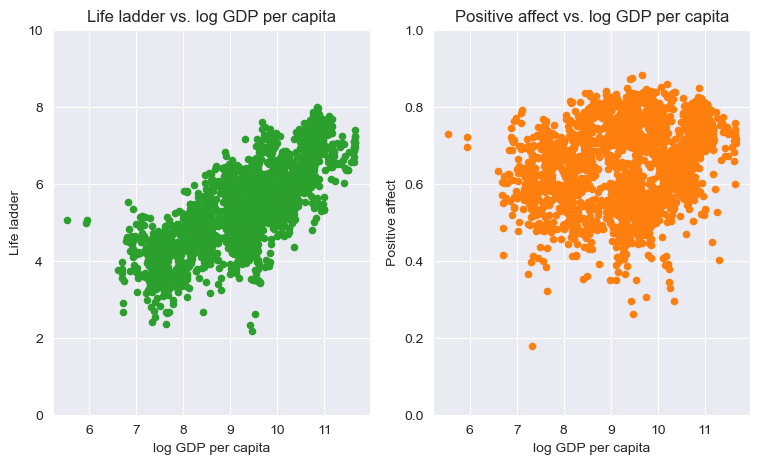

In [31]:
fig , axes = plt.subplots(1,2,figsize=(9,5))

# make a scatter plot for ladder vs. GDP
df_filled.plot.scatter(x = 'gdp', y = 'ladder', c = 'tab:green', ax = axes[0])
axes[0].set_ylabel('Life ladder')
axes[0].set_xlabel('log GDP per capita')
axes[0].set_title('Life ladder vs. log GDP per capita')
axes[0].set_ylim(0,10)

# make a scatter plot for positive vs. GDP
df_filled.plot.scatter(x = 'gdp', y = 'positive', c = 'tab:orange', ax = axes[1])
axes[1].set_ylabel('Positive affect')
axes[1].set_xlabel('log GDP per capita')
axes[1].set_title('Positive affect vs. log GDP per capita')
axes[1].set_ylim(0,1)

plt.show()

According to these two charts, GDP per capita has a different relationship on the two measures of happiness, life ladder and positive affect. There is a weak relationship, if any, between GDP per capita and positive affect. This suggests that maybe measuring happiness with life ladder is influenced by GDP. Perhaps the image of a life ladder evokes terms such as "career ladder" or "corporate ladder", which are associated with economic success. 

I'll take a look at freedom to make life choices and social support and their relationships with the two measures of happiness. 

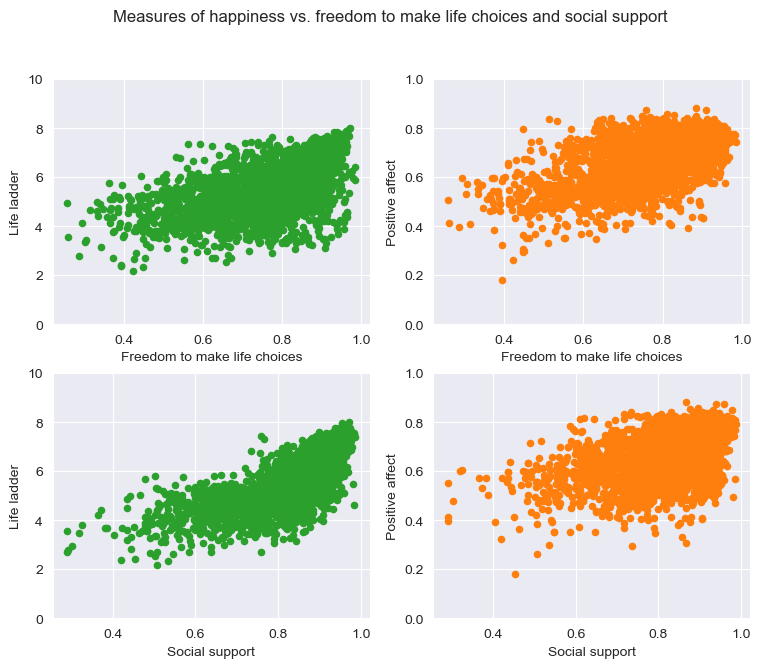

In [32]:
# create scatterplots for ladder/positive vs. choice/support

fig, axes = plt.subplots(2,2,figsize=(9,7))

colors = ['tab:green', 'tab:orange']
x_vars = ['choice', 'support']
y_vars = ['ladder', 'positive']
x_labels = ['Freedom to make life choices', 'Social support']
y_labels = ['Life ladder', 'Positive affect']

for i in range(2):
    for j in range(2):
        df_filled.plot.scatter(x = x_vars[i], y = y_vars[j], c = colors[j], ax = axes[i][j])
        axes[i][j].set_xlabel(x_labels[i])
        axes[i][j].set_ylabel(y_labels[j])
        axes[i][j].set_ylim(0,10**(1-j))

fig.suptitle('Measures of happiness vs. freedom to make life choices and social support')

plt.show()

I observe that both freedom to make life choices and social support are positively correlated with both measures of happiness. 

### Happiness rankings

In this section, I look at the rankings of countries in terms of their life life ladder scores. I rank each country for each year for which there is data and I want to eventually see if the highest ranked countries are consistently highly ranked. 

In [33]:
# Produce a table of the top 10 life ladder scores for each year

from IPython.display import  HTML

years = list(set(df_filled['year']))
years.sort()

max_num_of_countries = max(Counter(df_filled['year']).values())
rank_per_year = pd.DataFrame({'Rank' : range(1, max_num_of_countries+1)})

year_dfs = {}

for year in years:
    df_year = df_filled[df_filled['year'] == year].copy()
    df_year.sort_values('ladder', ascending = False, inplace = True)
    
    year_dfs[year] = df_year.reset_index(drop = True)
    
    rank_per_year[year] = (list(df_year['country']) + max_num_of_countries * [np.nan])[:max_num_of_countries]
    
display(HTML('<center><h1>Top 10 life ladder scores each year 2005-2022</h1></center>'))
display(HTML(rank_per_year.head(10).to_html(index=False)))

Rank,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Denmark,Finland,Denmark,Denmark,Denmark,Denmark,Denmark,Switzerland,Canada,Denmark,Norway,Finland,Finland,Finland,Finland,Finland,Finland,Finland
2,Netherlands,Switzerland,New Zealand,Finland,Costa Rica,Canada,Netherlands,Norway,Denmark,Switzerland,Switzerland,Norway,Denmark,Denmark,Switzerland,Iceland,Denmark,Israel
3,Canada,Norway,United States,Norway,Switzerland,Netherlands,Austria,Iceland,Iceland,Norway,Denmark,Denmark,Norway,Switzerland,Denmark,Denmark,Israel,Denmark
4,Australia,New Zealand,Canada,Netherlands,Canada,Sweden,Israel,Sweden,Austria,Israel,Iceland,Netherlands,Iceland,Netherlands,Iceland,Switzerland,Iceland,Iceland
5,Belgium,United States,Netherlands,Ireland,Israel,Venezuela,Canada,Denmark,Finland,Finland,Finland,Iceland,Switzerland,Norway,Norway,Netherlands,Sweden,Sweden
6,Venezuela,Israel,Costa Rica,Sweden,Sweden,Australia,Australia,Netherlands,Mexico,Netherlands,New Zealand,Switzerland,Netherlands,Austria,Netherlands,Sweden,Norway,Netherlands
7,Spain,Ireland,Australia,Canada,Venezuela,Finland,Sweden,Finland,Sweden,New Zealand,Canada,Sweden,Canada,Sweden,Luxembourg,Germany,Switzerland,Norway
8,France,Austria,Saudi Arabia,New Zealand,United States,Israel,Finland,Canada,Netherlands,Canada,Netherlands,Australia,Israel,New Zealand,Sweden,Norway,Netherlands,Luxembourg
9,United Kingdom,Costa Rica,Sweden,Spain,Ireland,Panama,Panama,Austria,Australia,Australia,Australia,Canada,New Zealand,Luxembourg,Israel,New Zealand,New Zealand,Costa Rica
10,Italy,United Arab Emirates,Belgium,United States,Panama,Austria,Costa Rica,Mexico,Israel,Costa Rica,Sweden,New Zealand,Austria,United Kingdom,Ireland,Austria,Australia,Mexico


Since the life ladder scores have many decimal places, I do not expect any countries to have the same life ladder score in the same year. I want to verify this since if there are matching life ladder scores, I want to handle the ties properly.

In [34]:
# check if there are any ties in life ladder scores
ties = False
for year_df in year_dfs.values():
    counts = Counter(year_df['ladder'])
    for num in counts:
        if counts[num] > 1:
            ties = True
            break
    if ties:
        break

if ties:
    print('There exist a tie in life ladder scores.')
else:
    print('There does not exist a tie in life ladder scores.')


There does not exist a tie in life ladder scores.


There are no ties in life ladder scores, so the rankings do not have handle shared ranks.

I see that only a handful of countries have reached the number one spot in terms of life ladder rankings. I will see how the rankings of these countries fluctuates. 

In [35]:
# get the life ladder ranks of all countries

all_country_ranks = []
country_list = df_filled['country'].drop_duplicates()

for country in country_list:
    country_ranks = []
    for year in years:
        if year_dfs[year].isin([country]).sum().sum():
            country_ranks.append(year_dfs[year][year_dfs[year]['country'] == country].index[0] + 1)
        else:
            country_ranks.append(np.nan)
    all_country_ranks.append(country_ranks)

all_country_ranks_df = pd.DataFrame(all_country_ranks, columns = years, index = country_list)

In [36]:
# get a list of the countries that have been at the top of the life ladder rankings
top_ctrys = []
top_1_df = rank_per_year[:1]

for year in years:
    for ctry in top_1_df[year]:
        if ctry not in top_ctrys:
            top_ctrys.append(ctry)

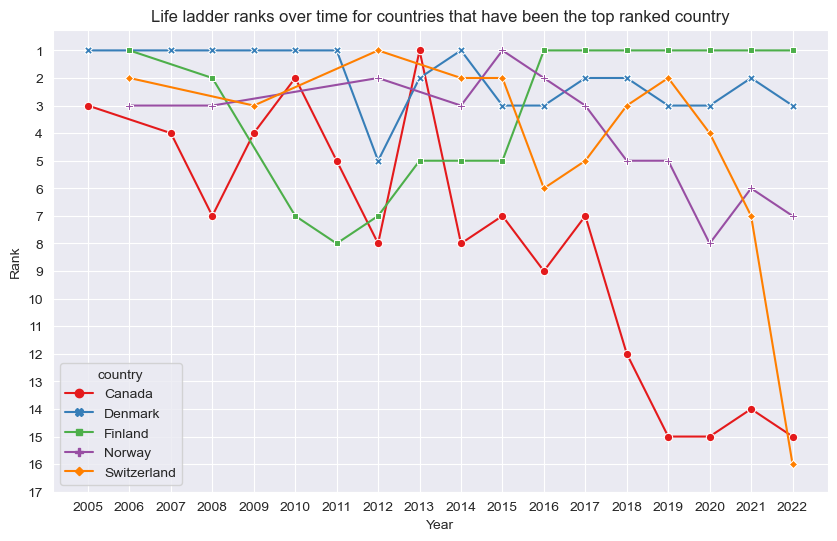

In [37]:
# draw a line plot for life ladder ranks for top ranked countries

top_country_ranks_df = all_country_ranks_df[all_country_ranks_df.index.isin(top_ctrys)]

data = top_country_ranks_df.transpose()
plt.figure(figsize = (10,6))
ax = sns.lineplot(data, markers = True, dashes = False, palette = 'Set1')
ax.invert_yaxis()

ax.set_xticks(range(2005,2023))
ax.set_yticks(range(1,18))

ax.set_ylabel('Rank')
ax.set_xlabel('Year')

ax.set_title('Life ladder ranks over time for countries that have been the top ranked country')

plt.show()

The countries that have been ranked number one for life ladder have been ranked in the top 20 for life ladder for all of the years with data available. However, it should be noted that there is missing data. 

This suggests that the countries that have been considered the happiest country remain among the happiest countries consistently. 

Now let's take a look at the countries that have the best average life ladder rank. Let's look at the life ladder rank distribution of those countries as well. 

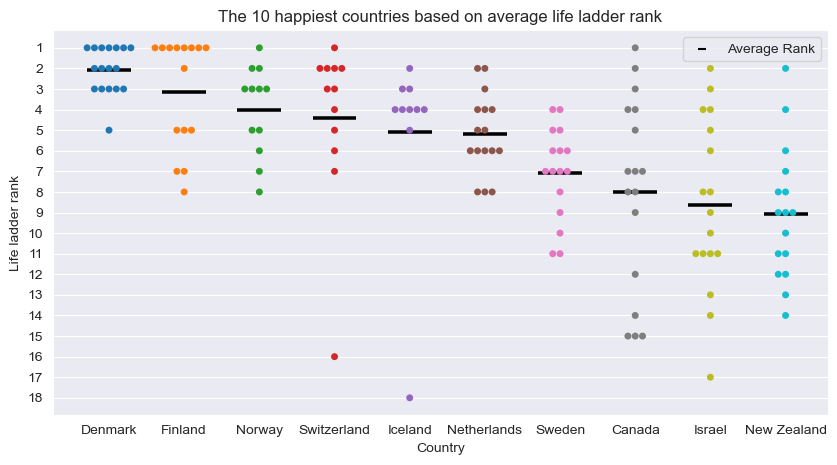

In [38]:
# showcase the rankings for the countries with the top 10 average life ladder rank

# obtain the countries with top 10 average life ladder rank
top_avg_rank_ctrys = all_country_ranks_df.mean(axis = 1).nsmallest(10).index
top_avg_rank_ctrys_df = all_country_ranks_df.loc[top_avg_rank_ctrys]

# set up a dataframe with the top 10 average ranks
top_rank_avg_df = pd.DataFrame(top_avg_rank_ctrys_df.mean(axis=1), columns = ['Average Rank'], index = top_avg_rank_ctrys)

# plot the ranks of each year of the top 10 countries
plt.figure(figsize = (10,5))
ax = sns.swarmplot(top_avg_rank_ctrys_df.transpose())
ax.invert_yaxis()
# plt.xticks(rotation=90)

# add in a line for the average rank
sns.scatterplot(top_rank_avg_df, ax = ax, markers = '_', s = 1000, palette=['k'])

ax.set_ylabel('Life ladder rank')
ax.set_xlabel('Country')
# ax.set_title('All life ladder ranks in the years 2005-2022 for the top 10 countries based on average rank')
ax.set_title('The 10 happiest countries based on average life ladder rank')
ax.set_yticks(range(1,19))
plt.show()

I see that the countries with a high average life ladder rank have fairly consistent high life ladder ranks.

### Happiness of the world
For this section, I ask the following question: Does the average happiness of the world change over time? I will first visualize the life ladder scores every year average over all the countries for which we have data. 

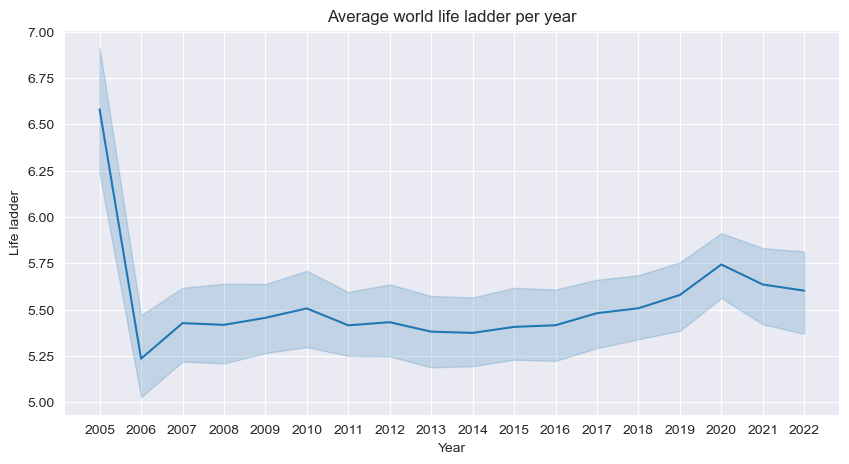

In [39]:
# make a line plot of life ladder (averaged over all countries) over time

plt.figure(figsize=(10,5))
ax = sns.lineplot(df_filled, x='year', y='ladder')
ax.set_xticks(range(2005, 2023))
ax.set_xlabel('Year')
ax.set_ylabel('Life ladder')
ax.set_title('Average world life ladder per year')
plt.show()

It appears that with the exception of the year 2005, the world average life ladder score does not change very much. I'll investigate the data for 2005 further. To this end, I ask how many data points we have for the year 2005.

In [40]:
print('There are {} countries with data for life ladder in 2005.'.format((df_filled['year'] == 2005).sum()))

There are 21 countries with data for life ladder in 2005.


I know that there is a positive correlation with log GDP per capita and life ladder, so I wonder if the few countries with data for 2005 have GDP per capita, since these countries are more likely to have more complete data. 

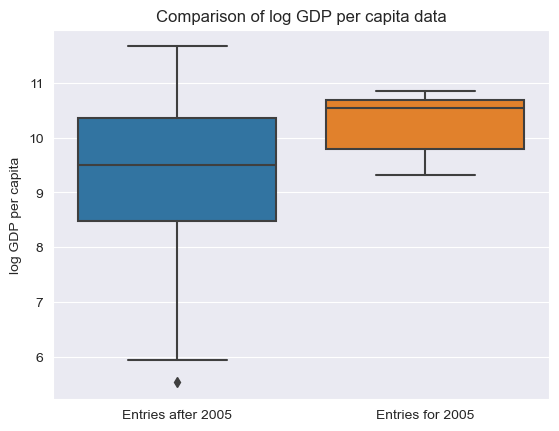

In [41]:
# compare GDP data for 2005 and after 2005

data = df_filled.copy()
data['2005'] = (df_filled['year'] == 2005)
ax = sns.boxplot(data, x = '2005', y = 'gdp')
ax.set_xticklabels(['Entries after 2005', 'Entries for 2005'])
ax.set_xlabel('')
ax.set_ylabel('log GDP per capita')
ax.set_title('Comparison of log GDP per capita data')
plt.show()

The countries with entries for 2005 have higher GDP per capita, which explains the higher world average life ladder for 2005. 

## Summary

While GDP per capita and life ladder are strongly positively correlated, this does not necessarily mean that a higher GDP per capita leads to happier citizens. The metric we use to measure happiness plays a role. If we used positive affect to measure happiness instead, then the correlation between GDP per capita and happiness becomes much weaker. This suggests that life ladder is a measure of happiness that is more influenced by economics. However, other factors such as freedom to make life choices and social support are positively correlated with both measures of happiness. 

As for countries considered among the happiest in terms of life ladder, they remain fairly consistently among the happiest countries. The top spots for the life ladder rankings are usually occupied the same handful of countries. 

Lastly, if I averaged the life ladder scores over every country for each year, I find that this average does not vary very much year to year. 